In [19]:
%matplotlib inline
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [30]:
#file load
citydata = "data/city_data.csv"
ridedata = "data/ride_data.csv"
city = pd.read_csv(citydata, low_memory=False)
ride = pd.read_csv(ridedata, low_memory=False)

#merging dataframes
pyberdata = pd.merge(ride, city, on="city" , how="outer")
citysorted = pyberdata.groupby(["city","driver_count","type"])
citytype = pyberdata["type"].unique()
citysorted.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban
24,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
25,South Michelleport,2018-03-02 09:54:50,33.12,813844006721,72,Urban
26,South Michelleport,2018-01-08 09:38:14,23.77,4916160406018,72,Urban
27,South Michelleport,2018-04-22 03:15:33,43.62,4663606096929,72,Urban
28,South Michelleport,2018-03-03 16:13:34,41.62,2339775503972,72,Urban


Text(46,37,'Note: Circle size correlates with number of drivers per city')

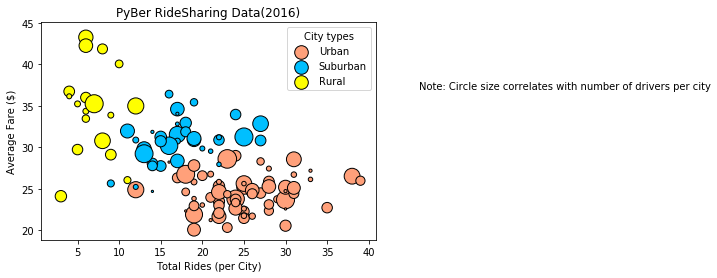

In [50]:
#city summary
citysum = pd.DataFrame()
citysum["total rides"] = citysorted["ride_id"].count()
citysum["average fare"] = citysorted["fare"].mean()
citysum["total fare"] = citysorted["fare"].sum()
citysum = citysum.reset_index()
citysum.head()
#x and y coordinates for each of the three city types
#scatter plot for each city types
colors = {"Urban":"lightsalmon","Suburban":"deepskyblue","Rural":"yellow"}
scatter = citysum[["total rides","average fare","type"]]

urban_set = citysum[citysum.type == "Urban"]
suburb_set = citysum[citysum.type == "Suburban"]
rural_set = citysum[citysum.type == "Rural"]
ax = urban_set.plot(kind="scatter",
                   x="total rides",y="average fare",
                   edgecolor='k',
                   s=citysum.driver_count*5,
                   color="lightsalmon",
                   label="Urban")
suburb_set.plot(kind="scatter",
               x="total rides",y="average fare",
               edgecolor='k',
               s=citysum.driver_count*5,
               color="deepskyblue",
               label="Suburban",
               ax=ax)
rural_set.plot(kind="scatter",x="total rides",y="average fare",
               edgecolor='k',
               s=citysum.driver_count*5,
               color="yellow",
               label="Rural",
               ax=ax)
#legend
plt.legend(title="City types")
#graph properties
plt.xlabel("Total Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer RideSharing Data(2016)")
#circle size text
plt.text(46,37, "Note: Circle size correlates with number of drivers per city")


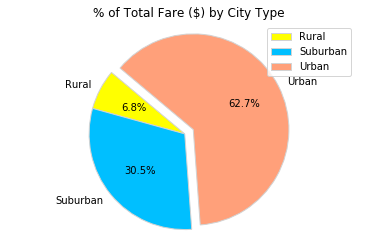

In [59]:
citytypesum.plot(kind="pie",y="total fare", autopct='%1.1f%%',
 startangle=140, shadow=False,explode=citytypesum.explode,
                       colors=citytypesum.colors,labels=citytypesum.type,
                      wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'lightgrey'})

plt.axis('off')
plt.axis('equal')
plt.title('% of Total Fare ($) by City Type')

plt.show()


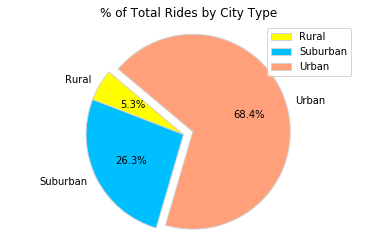

In [56]:
citygroup = citysum.groupby("type")

citytypesum = pd.DataFrame()

citytypesum["total rides"] = citygroup["total rides"].sum()
citytypesum["total drivers"] = citygroup["driver_count"].sum()
citytypesum["total fare"] = citygroup["total fare"].sum()
citytypesum.reset_index(inplace=True)


explode = {"Urban":0.1,"Suburban":0,"Rural":0}
citytypesum["explode"] = [explode[x] for x in citytypesum["type"]]
citytypesum["colors"] = [colors[x] for x in citytypesum["type"]]

citytypesum.plot(kind="pie",y="total rides", autopct='%1.1f%%',
 startangle=140, shadow=False,explode=citytypesum.explode,
                       colors=citytypesum.colors,labels=citytypesum.type,
                      wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'lightgrey'})

plt.axis('off')
plt.axis('equal')

plt.title('% of Total Rides by City Type')

plt.show()
# Show plot
plt.show()

## Total Drivers by City Type

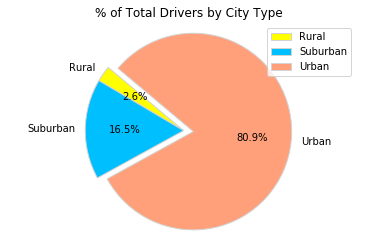

In [60]:
citytypesum.plot(kind="pie",y="total drivers", autopct='%1.1f%%',
 startangle=140, shadow=False,explode=citytypesum.explode,
                       colors=citytypesum.colors,labels=citytypesum.type,
                      wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'lightgrey'})

plt.axis('off')
plt.axis('equal')
plt.title('% of Total Drivers by City Type')

plt.show()